In [1]:
!pip install tensorflow matplotlib

In [2]:
!pip install numpy

In [3]:
!pip install --upgrade tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
print("NumPy Version:", np.__version__)
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2.19.0
NumPy Version: 1.26.4


In [5]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Sugercane",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4915 files belonging to 9 classes.


In [7]:
class_names=dataset.class_names
class_names

['Bacterial Blight',
 'Cercospora',
 'Healthy Coffee Leaf',
 'Healthy Sugarcane Leaf',
 'Mosaic',
 'RedRot',
 'Rust Coffee Leaf',
 'Rust Sugarcane Leaf',
 'Yellow']

In [8]:
len(dataset)

154

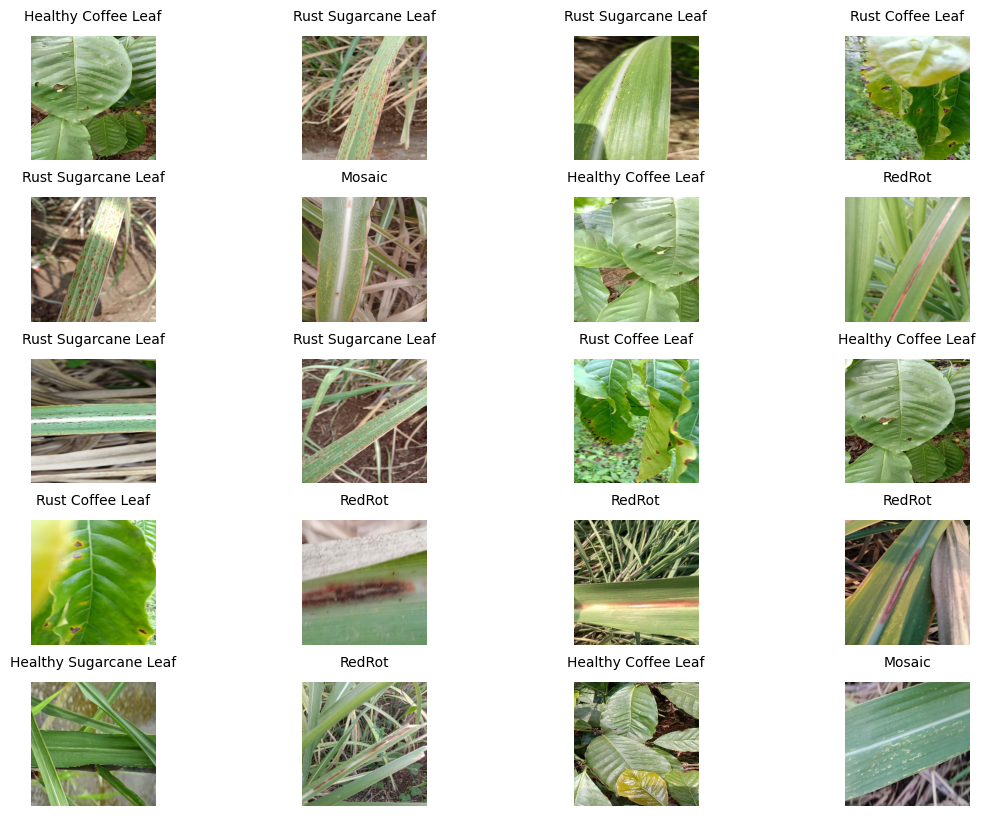

In [9]:
import matplotlib.pyplot as plt

for image_batch, label_batch in dataset.take(1):
    num_images = min(len(image_batch), 20)
    plt.figure(figsize=(14, 10))  # Increase figure size to make images larger

    for i in range(num_images):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")  # Hide axes for a cleaner look

        # Add text above each image with adjusted positioning
        plt.text(0.5, 1.1, class_names[label_batch[i]], ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    plt.subplots_adjust(wspace=0.001, hspace=0.3)  # Adjust spacing between images if needed
    plt.show()

In [10]:
len(dataset)

154

In [11]:
train_size=0.8
int(len(dataset)*train_size)

123

In [12]:
train_ds=dataset.take(40)
len(train_ds)

40

In [13]:
test_ds=dataset.skip(40)
len(test_ds)

114

In [14]:
val_size=0.1
int(len(dataset)*val_size)

15

In [15]:
val_ds=test_ds.take(5)
len(val_ds)

5

In [16]:
test_ds=test_ds.skip(5)
len(test_ds)

109

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

123

In [20]:
len(val_ds)

15

In [21]:
len(test_ds)

16

In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Define the image size and channels
IMAGE_SIZE = 224  # Replace with your desired image size
CHANNELS = 3  # Usually 3 for RGB images

# Load MobileNetV2 as the base model
base_model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
                         include_top=False,
                         weights='imagenet')

In [27]:
for layer in base_model.layers[:-50]:  # Freeze all layers except the last 50 layers
    layer.trainable = False

In [28]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

# Define the input shape excluding the batch size
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

# Define the Sequential model
model = models.Sequential([
    # Input Layer
    layers.Input(shape=input_shape),

    # Data Preprocessing Layers
    resize_and_rescale,    # Resizes images and rescales pixel values
    data_augmentation,     # Applies data augmentation techniques

    # Convolutional Block 1
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Block 2
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Block 3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

# Print the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 12,921,625 (49.29 MB)

 Trainable params: 12,920,665 (49.29 MB)

 Non-trainable params: 960 (3.75 KB)

In [29]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Use appropriate loss based on your labels
    metrics=['accuracy']
)

In [30]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.4356 - loss: 7.8956 - val_accuracy: 0.1562 - val_loss: 8.5178
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6227 - loss: 3.6291 - val_accuracy: 0.0958 - val_loss: 17.3250
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.6548 - loss: 4.2271 - val_accuracy: 0.2646 - val_loss: 4.7331
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.6928 - loss: 2.8403 - val_accuracy: 0.3729 - val_loss: 3.9237
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.7396 - loss: 2.6028 - val_accuracy: 0.6229 - val_loss: 2.5759
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7446 - loss: 2.4064 - val_accuracy: 0.7167 - val_loss: 2.3523
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7902 - loss: 2.0917 - val_accuracy: 0.6125 - val_loss: 2.6279
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.7690 - loss: 2.1532 - val_acc

In [31]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler

# Freeze the base model
base_model.trainable = False

# Compile the model for initial training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for the first phase
model.fit(train_ds, epochs=20, validation_data=val_ds)

# Unfreeze the top layers of the base model
base_model.trainable = True
fine_tune_at = 100  # Fine-tune after the 100th layer

# Freeze layers before `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Define a learning rate schedule function for 20 epochs
def lr_schedule(epoch, lr):
    if epoch < 10:
        return float(lr)  # Keep the learning rate constant for the first 10 epochs
    else:
        return float(lr * tf.math.exp(-0.1))  # Gradually decay the learning rate after epoch 10

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

# Compile the model for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[lr_scheduler])

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9255 - loss: 1.9790 - val_accuracy: 0.9375 - val_loss: 1.0859
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9606 - loss: 0.9265 - val_accuracy: 0.9396 - val_loss: 0.7055
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9641 - loss: 0.6308 - val_accuracy: 0.9500 - val_loss: 0.5447
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9679 - loss: 0.5012 - val_accuracy: 0.9521 - val_loss: 0.5181
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9701 - loss: 0.4595 - val_accuracy: 0.9583 - val_loss: 0.4825
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9729 - loss: 0.4204 - val_accuracy: 0.9500 - val_loss: 0.4771
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9767 - loss: 0.4034 - val_accuracy: 0.9417 - val_loss: 0.4676
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9744 - loss: 0.3860 - val_accu

In [32]:
scores=model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.9762 - loss: 0.1926


In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

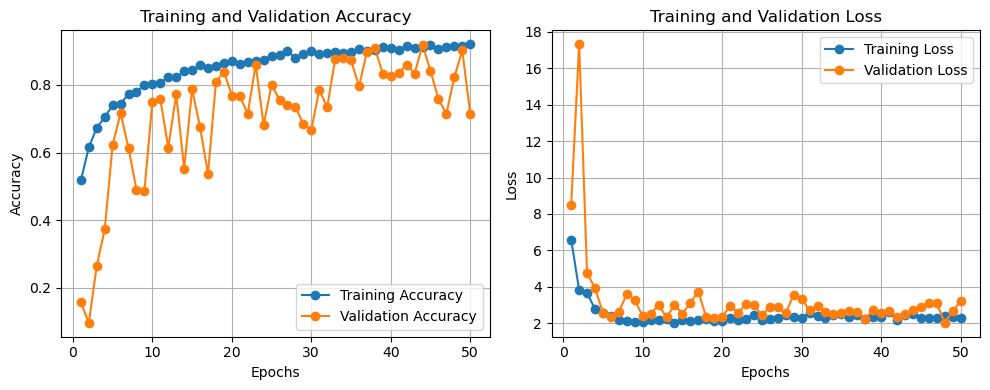

In [35]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots with reduced figure size
plt.figure(figsize=(10, 4))  # Adjusted the width and height

# Plot accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

First image to predict:
Actual label: Mosaic
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
Predicted label: Mosaic


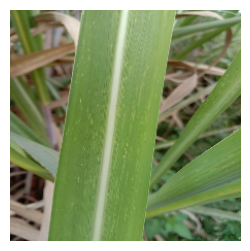

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Take one batch from the test dataset
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')  # Convert to uint8 format
    first_label = labels_batch[0].numpy()

    print("First image to predict:")
    plt.figure(figsize=(3, 3))  # Adjust the size of the displayed image
    plt.imshow(first_image)
    plt.axis("off")
    print("Actual label:", class_names[first_label])

    # Make predictions
    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0) #create a batch

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


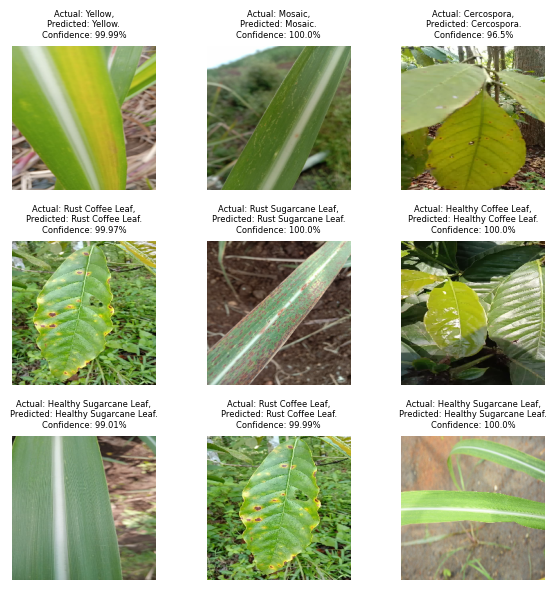

In [38]:
plt.figure(figsize=(6, 6))  # Reduced the overall figure size
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # 3x3 grid
        plt.imshow(images[i].numpy().astype("uint8"))

        # Use the predict function to get the predicted class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        # Adjusted font size for smaller titles
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%", fontsize=6)
        plt.axis("off")

# Show the plot
plt.tight_layout()  # Ensure proper spacing
plt.show()

In [41]:
import os

def save_model_versioned(model, folder_path='../Models', base_name='model', extension='.keras'):
    # Ensure the folder exists
    os.makedirs(folder_path, exist_ok=True)

    # Get the list of existing model files in the specified folder
    existing_models = [f for f in os.listdir(folder_path) if f.startswith(base_name) and f.endswith(extension)]

    # Determine the next model version number
    if existing_models:
        # Extract the version number from existing filenames
        versions = [int(f[len(base_name):-len(extension)]) for f in existing_models if f[len(base_name):-len(extension)].isdigit()]
        next_version = max(versions) + 1
    else:
        next_version = 1  # Start with version 1 if no models exist

    # Create the new filename
    new_model_name = os.path.join(folder_path, f"{base_name}{next_version}{extension}")

    # Save the model
    model.save(new_model_name)
    print(f"Model saved as: {new_model_name}")

# Example usage before training
# Assuming you have already trained your model:
# model.fit(...)  # Your training code goes here

# Save the model with versioning after training
save_model_versioned(model, folder_path='../Models', base_name='universal', extension='.keras')

Model saved as: ../Models\universal4.keras
